<a href="https://colab.research.google.com/github/jaminiv/The-Behavioral-Risk-Factor-Data-on-Tobacco-Use/blob/main/Tobacco_addiction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **The Behavioral Risk Factor Data on Tobacco Use**

The Behavioral Risk Factor Data on Tobacco Use (2010 and Prior), provided by the Centers for Disease Control and Prevention (CDC), offers insights into tobacco use patterns in the U.S. from data collected through the State Tobacco Activities Tracking and Evaluation (STATE) System and the Behavioral Risk Factor Surveillance System (BRFSS) surveys, spanning from 1996 to 2010.

The BRFSS is a state-based, continuous surveillance system that gathers data on modifiable risk factors for chronic diseases and other major causes of death. The data from the STATE System, which was derived from the BRFSS surveys, focuses on key tobacco-related topics, such as:

* Cigarette smoking status (whether individuals currently smoke, have smoked, or have never smoked).
* Cigarette smoking prevalence across different demographic groups (age, gender, race/ethnicity, etc.).
* The frequency of cigarette smoking among those who smoke.
* The frequency and success of quit attempts by smokers.


Importantly, this data should not be compared to BRFSS data collected from 2011 onward, as the survey methodologies were altered after that year.

Source Attribution: Centers for Disease Control and Prevention, Data.gov.

**1. Import all the important libraries.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge


**2. Upload the data set under the variable 'tobdata'**

In [ ]:
tobdata= pd.read_csv("/content/drive/MyDrive/PROJECT/Tobacco use -1969-2010.xls")

**3. Display the dataset**

In [ ]:
print(tobdata)

       YEAR LocationAbbr LocationDesc                       TopicDesc  \
0      2010           AL      Alabama              Cessation (Adults)   
1      2010           AL      Alabama          Cigarette Use (Adults)   
2      2010           AL      Alabama          Cigarette Use (Adults)   
3      2010           AL      Alabama          Cigarette Use (Adults)   
4      2010           AL      Alabama          Cigarette Use (Adults)   
...     ...          ...          ...                             ...   
38045  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38046  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38047  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38048  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38049  1996           WY      Wyoming              Cessation (Adults)   

              MeasureDesc  Data_Value(%)  Sample_Size  Gender       Race  \
0            Quit Smoking           53.3       

In [ ]:
tobdata.head()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Data_Value(%),Sample_Size,Gender,Race,Age,Education,DataSource
0,2010,AL,Alabama,Cessation (Adults),Quit Smoking,53.3,659.0,Female,All Races,All Ages,All Grades,BRFSS
1,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,18.7,5234.0,Female,All Races,All Ages,All Grades,BRFSS
2,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,18.6,1197.0,Female,All Races,18 to 44 Years,All Grades,BRFSS
3,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,21.5,5349.0,Female,White,All Ages,All Grades,BRFSS
4,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,21.8,104.0,Female,Hispanic,All Ages,All Grades,BRFSS


In [ ]:
tobdata.tail()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Data_Value(%),Sample_Size,Gender,Race,Age,Education,DataSource
38045,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,54.0,207.0,Male,All Races,All Ages,All Grades,BRFSS
38046,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,28.2,207.0,Male,All Races,All Ages,All Grades,BRFSS
38047,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,20.8,516.0,Male,All Races,All Ages,All Grades,BRFSS
38048,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,13.9,309.0,Female,All Races,All Ages,All Grades,BRFSS
38049,1996,WY,Wyoming,Cessation (Adults),Quit Smoking,55.4,579.0,Male,All Races,All Ages,All Grades,BRFSS


In [ ]:
###to check the size of the dataset
print(tobdata.shape)

(38050, 12)


**3. Data Cleaning**

*Using info() code to get a comprehensive overview of the dataset, this included columns, data type, null value and dimensions as viewed below.*

In [ ]:
tobdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38050 entries, 0 to 38049
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           38050 non-null  int64  
 1   LocationAbbr   38050 non-null  object 
 2   LocationDesc   38050 non-null  object 
 3   TopicDesc      38050 non-null  object 
 4   MeasureDesc    38050 non-null  object 
 5   Data_Value(%)  36091 non-null  float64
 6   Sample_Size    36041 non-null  float64
 7   Gender         38050 non-null  object 
 8   Race           38050 non-null  object 
 9   Age            38050 non-null  object 
 10  Education      38050 non-null  object 
 11  DataSource     38050 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.5+ MB


In [ ]:
### To create the copy of dataset for further cleaning and updation
Ctobdata = tobdata.copy()

*Identifying the duplicate values and handling those values by dropping them.*

In [ ]:
### To check the number of duplicate values
Dup = Ctobdata.duplicated().sum()
if Dup >0:
    print("There is",Dup,"Duplicate value")
else:
    print("No Duplicate value")

There is 3053 Duplicate value


In [ ]:
### Removing Duplicate values
Ctobdata=Ctobdata.drop_duplicates()
Dup = Ctobdata.duplicated().sum()
print("After treating duplicates, there are",Dup,"duplicate values")

After treating duplicates, there are 0 duplicate values


*Identifying the null values and imputing the null values using mean.*

In [ ]:
###To check the number of null values and fill the null values
Null_value=Ctobdata.isnull().sum()
print("There are",Null_value,"Null Values")
Null_mean=Ctobdata.isnull().mean() * 100
Null_mean

There are YEAR                0
LocationAbbr        0
LocationDesc        0
TopicDesc           0
MeasureDesc         0
Data_Value(%)    1311
Sample_Size      1361
Gender              0
Race                0
Age                 0
Education           0
DataSource          0
dtype: int64 Null Values


,0
YEAR,0.000000
LocationAbbr,0.000000
LocationDesc,0.000000
TopicDesc,0.000000
MeasureDesc,0.000000
Data_Value(%),3.746035
Sample_Size,3.888905
Gender,0.000000
Race,0.000000
Age,0.000000


In [ ]:
# Fill all NaN values with 0 for the entire DataFrame
tob_filled = Ctobdata.fillna(0)

# Instead of using inplace=True, reassign the result to the DataFrame columns
Ctobdata['Data_Value(%)'] = Ctobdata['Data_Value(%)'].fillna(Ctobdata['Data_Value(%)'].mean())
Ctobdata['Sample_Size'] = Ctobdata['Sample_Size'].fillna(Ctobdata['Sample_Size'].mean())


In [ ]:
###Null value check after imputing and treating the null value
Ctobdata.isnull().sum()

,0
YEAR,0
LocationAbbr,0
LocationDesc,0
TopicDesc,0
MeasureDesc,0
Data_Value(%),0
Sample_Size,0
Gender,0
Race,0
Age,0


*Checking for Garbage Values and Their Frequency*

In [ ]:
###check garbage values (unique value and its frequency)
for column in Ctobdata.select_dtypes(include="object").columns:
    print(f"{Ctobdata[column].value_counts()}\n")

LocationAbbr
CA    675
WA    675
MN    674
NV    674
TX    673
AK    673
MI    673
OK    672
FL    672
OR    671
AZ    671
MA    671
NY    671
NM    670
NJ    670
NC    670
MD    670
PA    668
RI    668
VA    668
KS    668
IN    668
WI    667
CO    666
CT    666
MO    666
LA    664
GA    664
NE    664
OH    663
SC    663
DE    663
IL    663
AR    659
ID    658
UT    658
AL    655
IA    654
DC    653
KY    651
MS    650
MT    649
NH    649
SD    647
VT    647
HI    647
WY    646
TN    645
WV    644
ND    640
ME    638
PR    555
VI    369
GU    259
US     50
Name: count, dtype: int64

LocationDesc
California                         675
Washington                         675
Minnesota                          674
Nevada                             674
Texas                              673
Alaska                             673
Michigan                           673
Oklahoma                           672
Florida                            672
Oregon                             671
Arizona

In [ ]:
### Cleaned dataset displayed
Ctobdata

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Data_Value(%),Sample_Size,Gender,Race,Age,Education,DataSource
0,2010,AL,Alabama,Cessation (Adults),Quit Smoking,53.3,659.0,Female,All Races,All Ages,All Grades,BRFSS
1,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,18.7,5234.0,Female,All Races,All Ages,All Grades,BRFSS
2,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,18.6,1197.0,Female,All Races,18 to 44 Years,All Grades,BRFSS
3,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,21.5,5349.0,Female,White,All Ages,All Grades,BRFSS
4,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,21.8,104.0,Female,Hispanic,All Ages,All Grades,BRFSS
...,...,...,...,...,...,...,...,...,...,...,...,...
38045,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,54.0,207.0,Male,All Races,All Ages,All Grades,BRFSS
38046,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,28.2,207.0,Male,All Races,All Ages,All Grades,BRFSS
38047,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,20.8,516.0,Male,All Races,All Ages,All Grades,BRFSS
38048,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,13.9,309.0,Female,All Races,All Ages,All Grades,BRFSS


In [ ]:
###To check the null value, datatype, number of columns and number of rows of the cleaned dataset.
Ctobdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34997 entries, 0 to 38049
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           34997 non-null  int64  
 1   LocationAbbr   34997 non-null  object 
 2   LocationDesc   34997 non-null  object 
 3   TopicDesc      34997 non-null  object 
 4   MeasureDesc    34997 non-null  object 
 5   Data_Value(%)  34997 non-null  float64
 6   Sample_Size    34997 non-null  float64
 7   Gender         34997 non-null  object 
 8   Race           34997 non-null  object 
 9   Age            34997 non-null  object 
 10  Education      34997 non-null  object 
 11  DataSource     34997 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.5+ MB


**4. Exploratory Data Analysis(EDA)**

*Performing the statistical analysis*

*Pichart plotted for every Object valued columns to see distrubution of data*

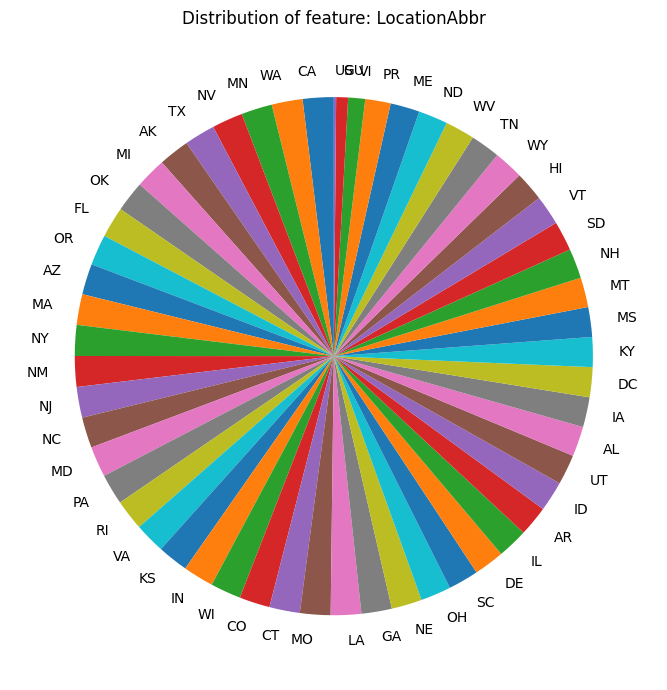

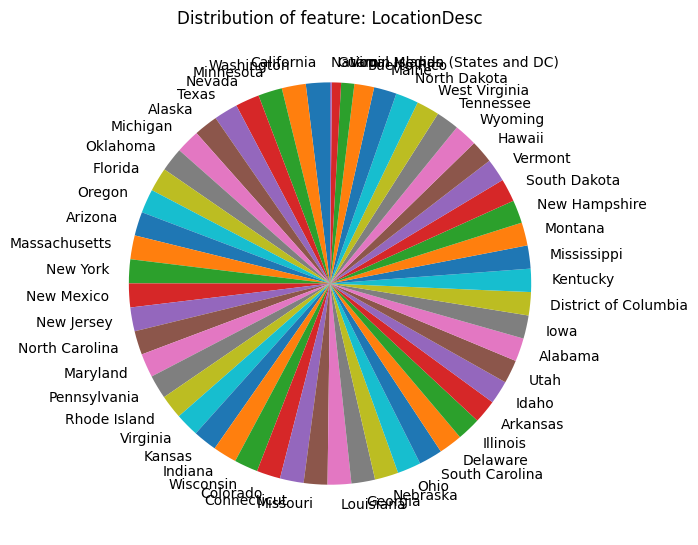

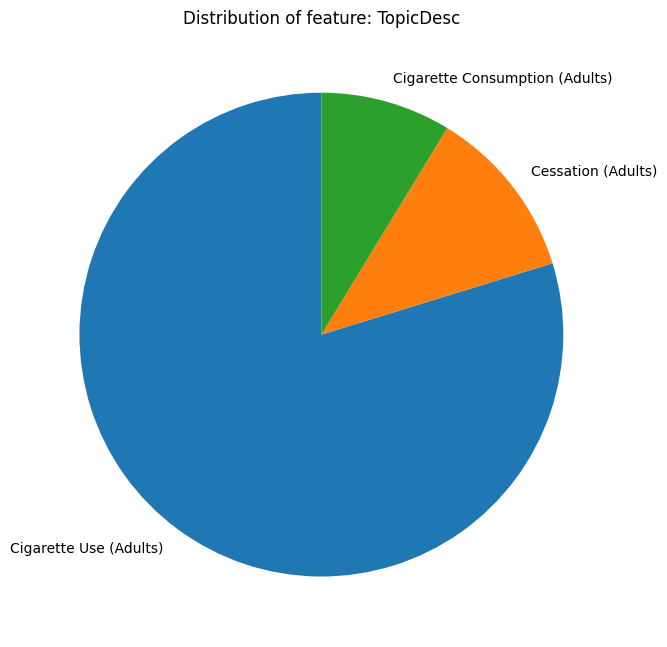

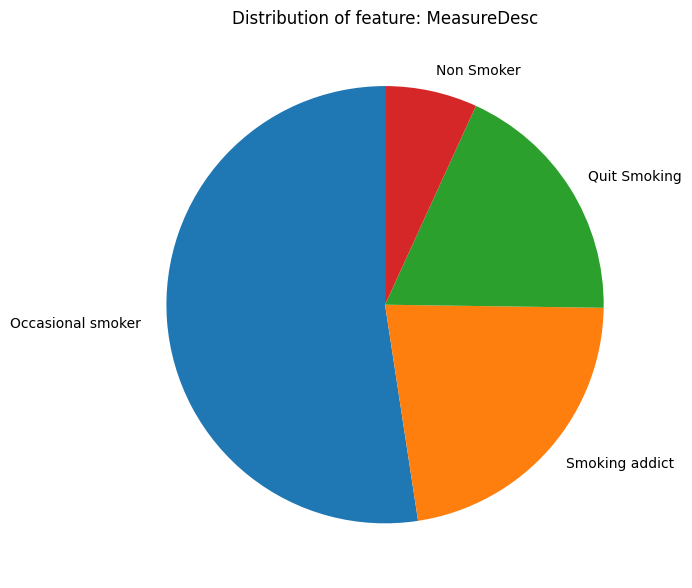

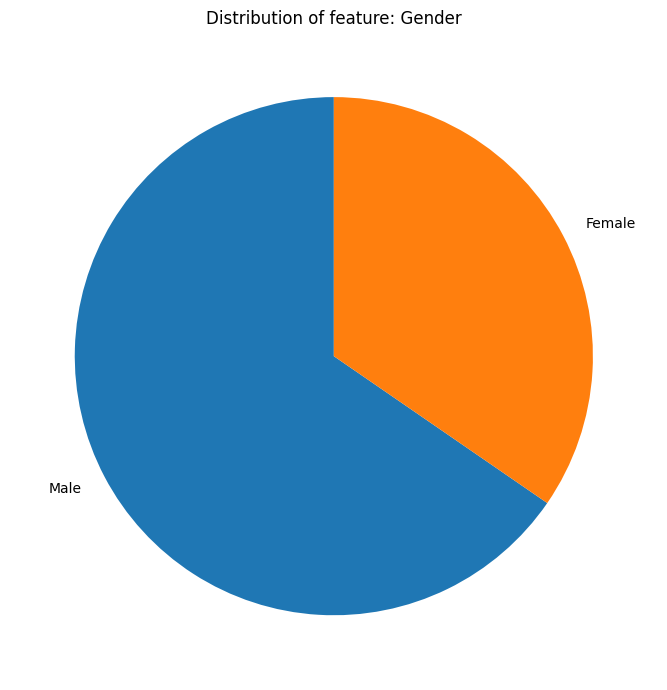

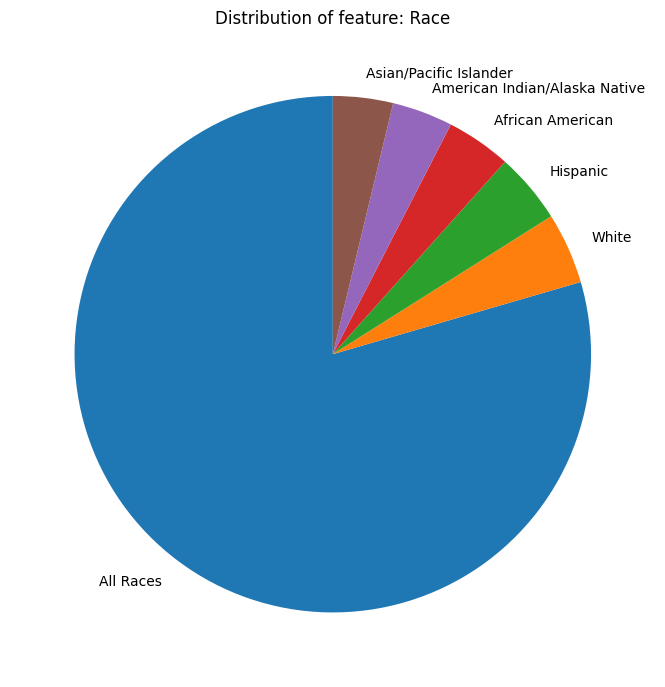

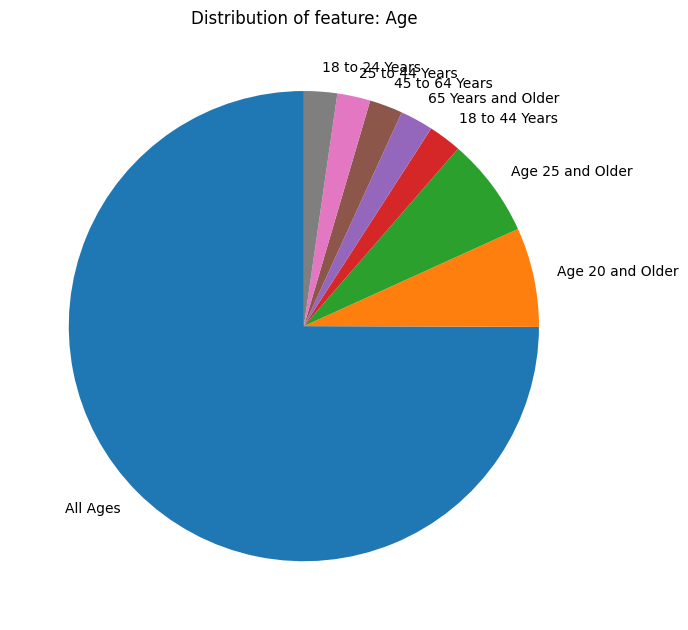

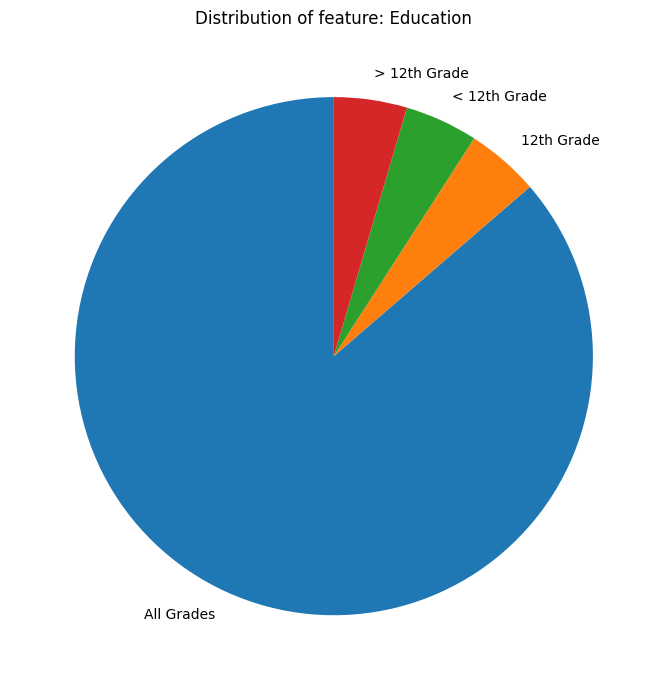

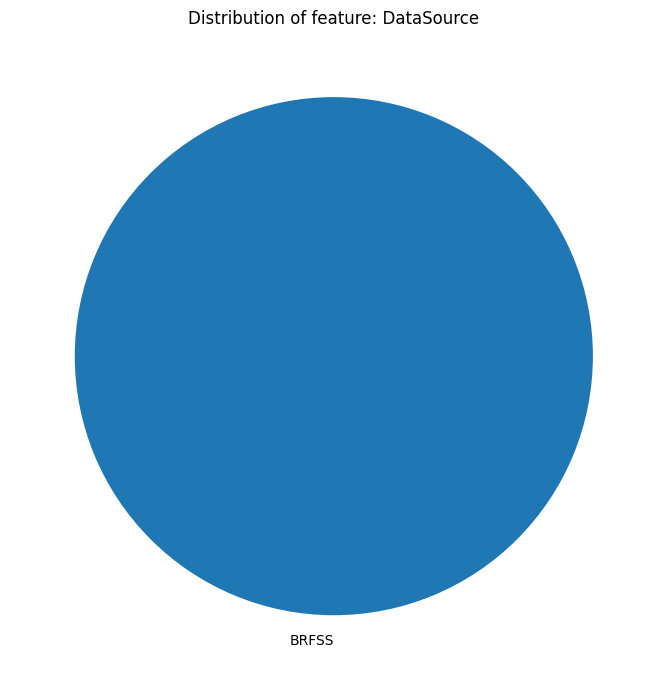

In [ ]:
# Loop through all columns in the DataFrame
for column in Ctobdata.columns:
    # Check if the column is categorical (object type or categorical dtype)
    if Ctobdata[column].dtype == 'object' or Ctobdata[column].dtype.name == 'category':
        # Count the occurrences of each category in the column
        category_counts = Ctobdata[column].value_counts()

        # Create a pie chart
        plt.figure(figsize=(7, 7))
        plt.pie(category_counts, labels=category_counts.index, startangle=90)

        # Add a title
        plt.title(f'Distribution of feature: {column}')

        # Display the pie chart
        plt.tight_layout()
        plt.show()
        print("\n")

*Ploting the numerical value in hisplot*

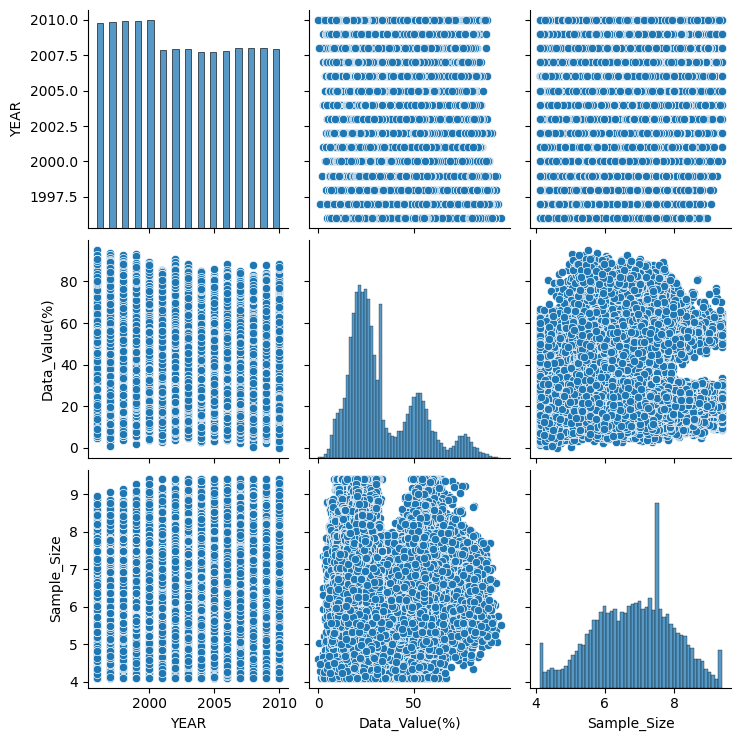

In [ ]:
sns.pairplot(Ctobdata)
plt.show()

In [ ]:
Ctobdata.describe(include='number').round(2).style.background_gradient()

,YEAR,Data_Value(%),Sample_Size
count,34997.000000,34997.000000,34997.000000
mean,2002.760000,33.180000,1764.450000
std,4.360000,18.140000,2460.490000
min,1996.000000,0.000000,50.000000
25%,1999.000000,20.300000,391.000000
50%,2003.000000,26.900000,988.000000
75%,2007.000000,46.500000,2076.000000
max,2010.000000,95.200000,42835.000000


Skewness Treatment

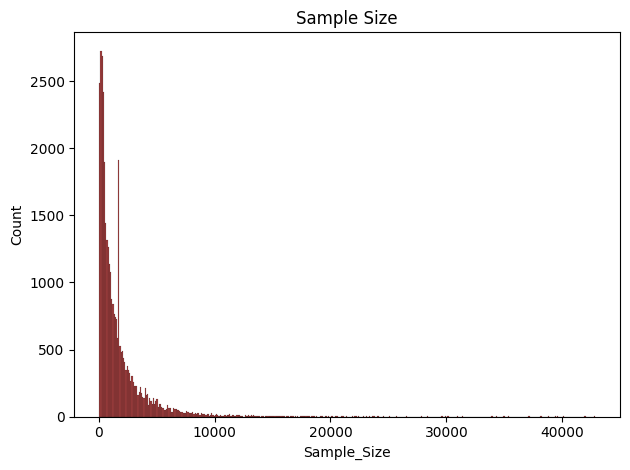

In [ ]:
# Create a histogram for the 'Sample_Size' column
plt.figure()
sns.histplot(Ctobdata['Sample_Size'], color='maroon', kde=False)

# Display the plot
plt.title("Sample Size")
plt.tight_layout()
plt.show()

In [ ]:
# Apply log1p transformation to handle zeros
Ctobdata['Sample_Size'] = np.log1p(Ctobdata['Sample_Size'])

In [ ]:
# Calculate the lower and upper bounds for capping (e.g., 1st and 99th percentiles)
lower_bound = Ctobdata['Sample_Size'].quantile(0.01)
upper_bound = Ctobdata['Sample_Size'].quantile(0.99)

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: 4.110873864173311
Upper Bound: 9.3865700765192


In [ ]:
Ctobdata['Sample_Size'] = Ctobdata['Sample_Size'].clip(lower=lower_bound, upper=upper_bound)

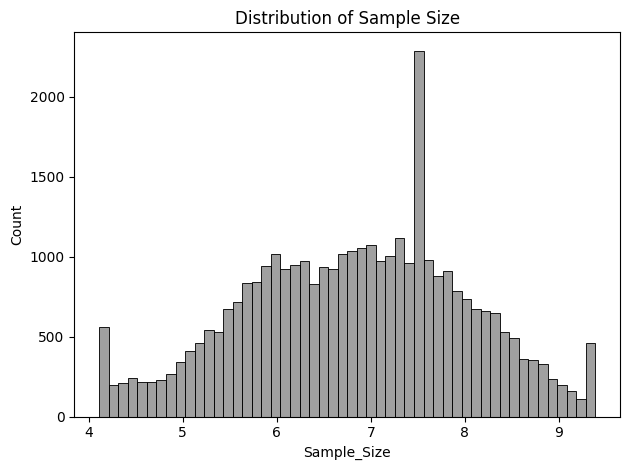

In [ ]:
# Chart - 2 visualization code
#Dependent varaible "Appliance" after Skewness log mode Treatment for variable appliances

# Create a histogram for the 'Sample_Size' column
plt.figure()
sns.histplot(Ctobdata['Sample_Size'], color='grey', kde=False)

# Display the plot
plt.title("Distribution of Sample Size")
plt.tight_layout()
plt.show()

*Plotting the object values in pairplot.*

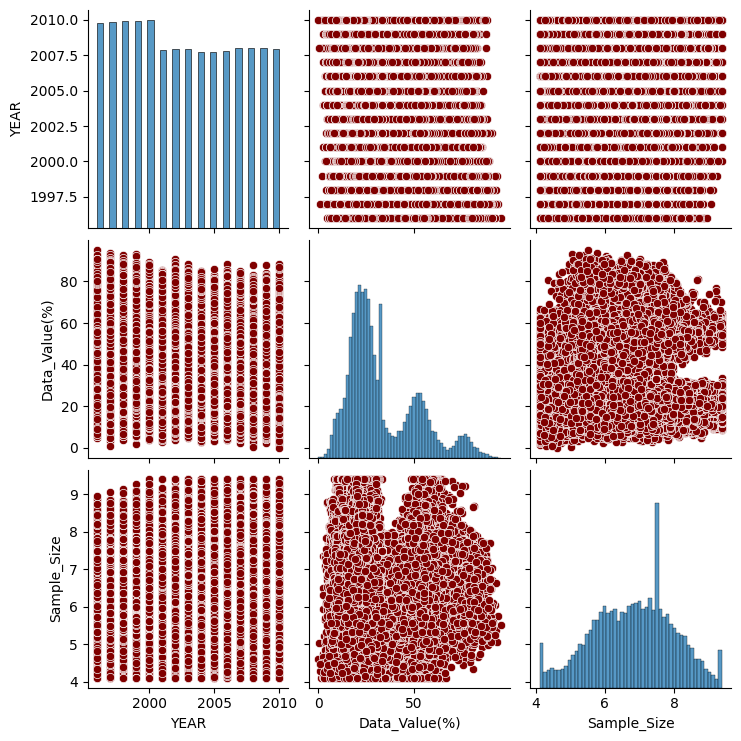

In [ ]:
# Create the pairplot with numeric columns and change the color to maroon
numeric_columns = Ctobdata.select_dtypes(exclude=['object']).columns
sns.pairplot(Ctobdata[numeric_columns], plot_kws={'color': 'maroon'})

# Display the plot
plt.show()


*Plotting the Bar graph to understand the target value.*

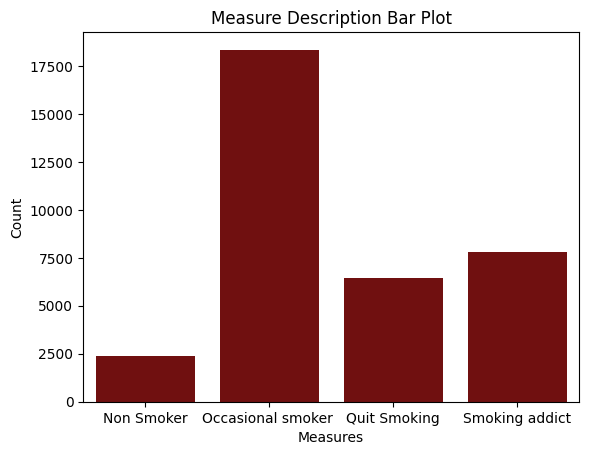

In [ ]:
plt.figure()
sns.barplot(x="MeasureDesc", y="count", data=Ctobdata.groupby('MeasureDesc').size().reset_index(name='count'), color='maroon')
plt.title('Measure Description Bar Plot')
plt.xlabel('Measures')
plt.ylabel('Count')
plt.show()

*Finding and handling the outliers of the dataset*

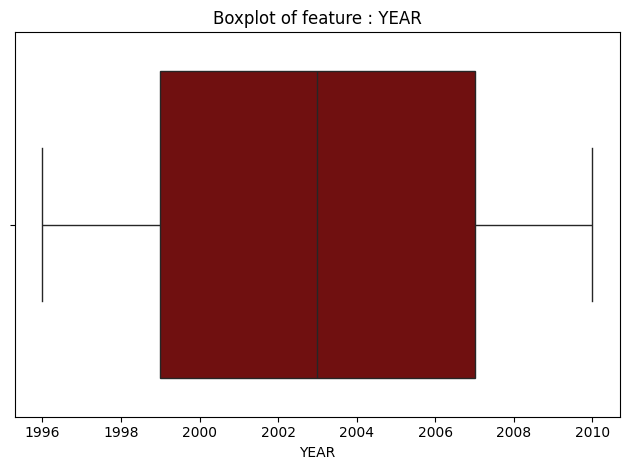

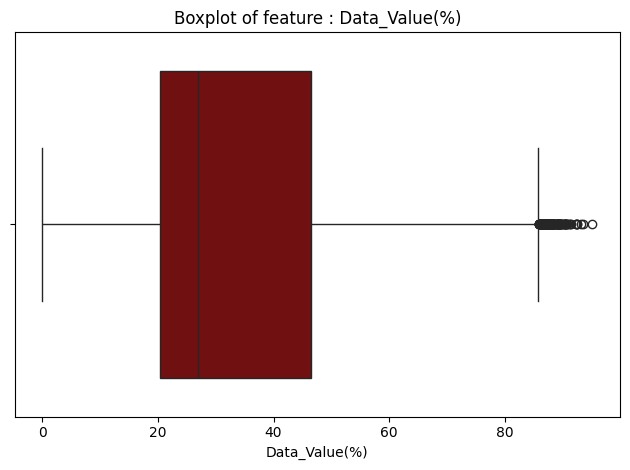

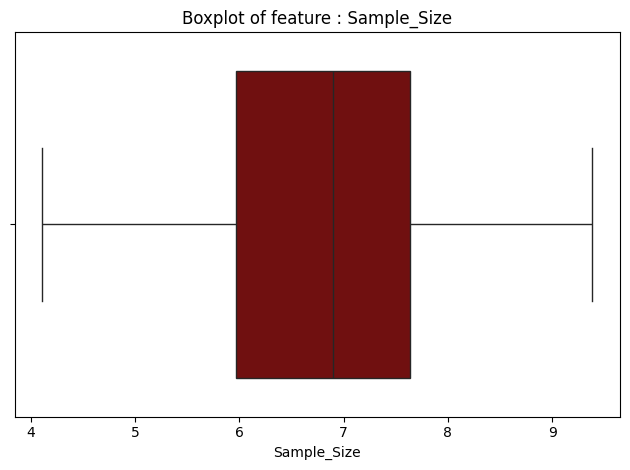

In [ ]:
### Outlier detection using boxplot
for column in Ctobdata.select_dtypes(include="number").columns:
    if column == "MeasureDesc":
        continue
    sns.boxplot(data=Ctobdata, x=column,color='maroon')
    plt.title(f"Boxplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

In [ ]:
Ctobdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34997 entries, 0 to 38049
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           34997 non-null  int64  
 1   LocationAbbr   34997 non-null  object 
 2   LocationDesc   34997 non-null  object 
 3   TopicDesc      34997 non-null  object 
 4   MeasureDesc    34997 non-null  object 
 5   Data_Value(%)  34997 non-null  float64
 6   Sample_Size    34997 non-null  float64
 7   Gender         34997 non-null  object 
 8   Race           34997 non-null  object 
 9   Age            34997 non-null  object 
 10  Education      34997 non-null  object 
 11  DataSource     34997 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.5+ MB


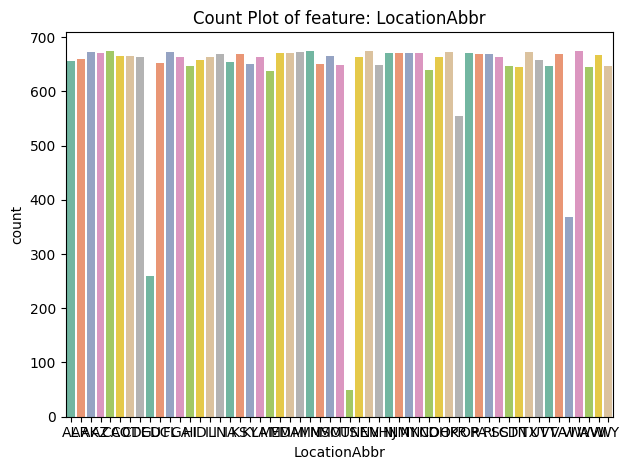

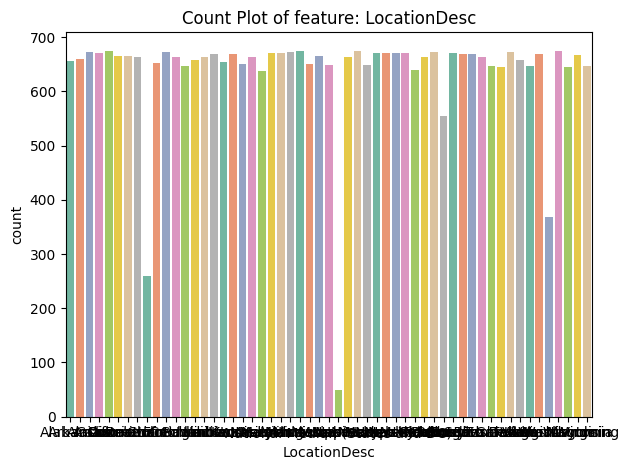

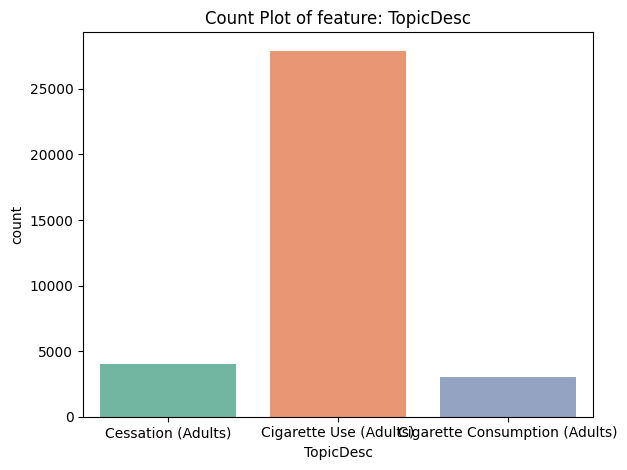

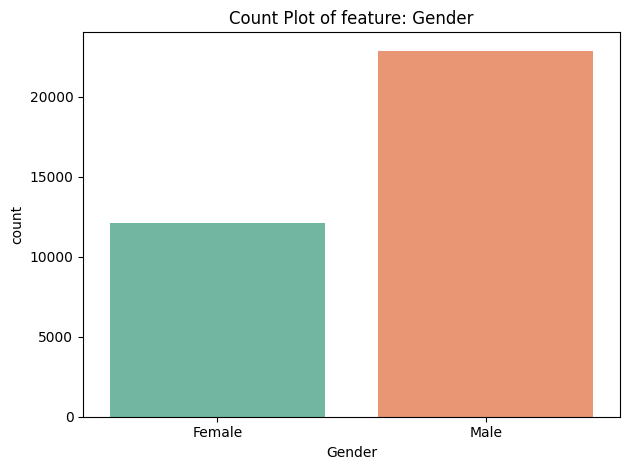

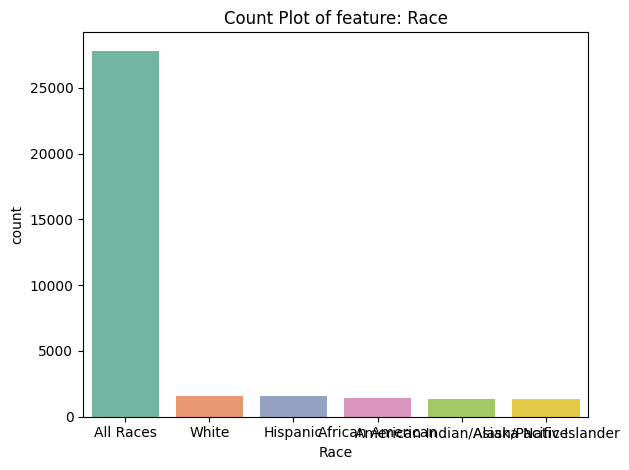

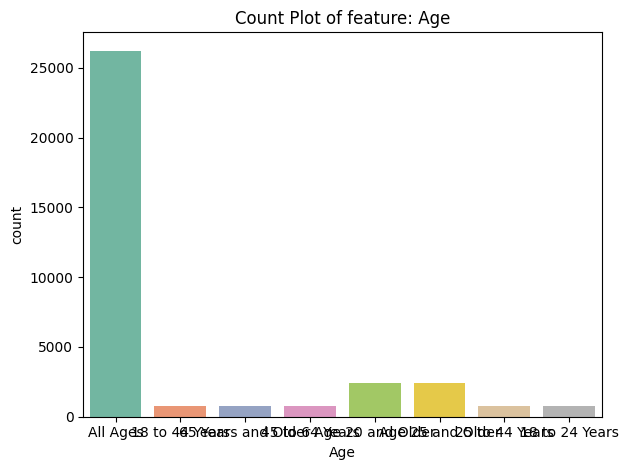

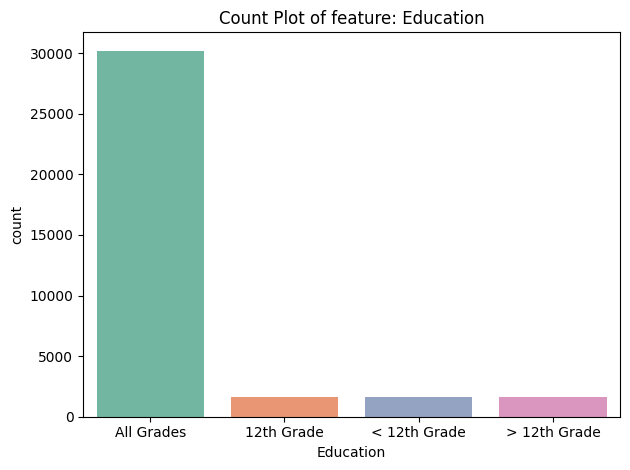

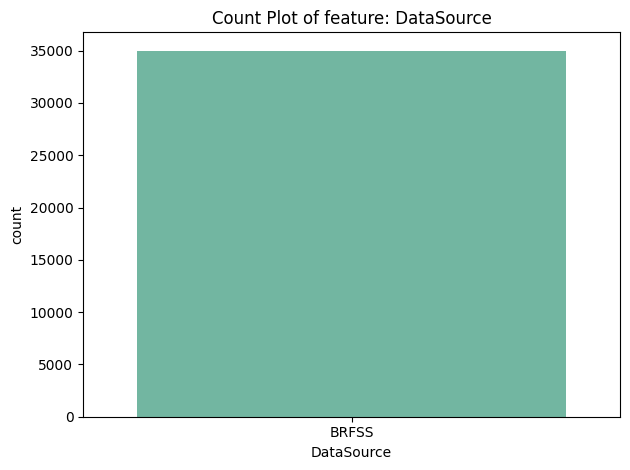

In [ ]:
# Loop through all columns in the DataFrame
for column in Ctobdata.columns:
    if column == "MeasureDesc":
        continue  # Skip the "MeasureDesc" column

    # Check if the column is categorical (object type or categorical dtype)
    if Ctobdata[column].dtype == 'object' or Ctobdata[column].dtype.name == 'category':
        # Create a count plot with the 'hue' argument assigned to 'x' to avoid the warning
        plt.figure()
        sns.countplot(data=Ctobdata, x=column, hue=column, palette='Set2', legend=False)

        # Add a title
        plt.title(f'Count Plot of feature: {column}')

        # Display the plot
        plt.tight_layout()
        plt.show()
        print("\n")

*Finding the Correlation of the Dataset*

In [ ]:
correlation_matrix = Ctobdata.select_dtypes(include="number").corr()
correlation_matrix

,YEAR,Data_Value(%),Sample_Size
YEAR,1.000000,0.018261,0.272659
Data_Value(%),0.018261,1.000000,-0.063787
Sample_Size,0.272659,-0.063787,1.000000


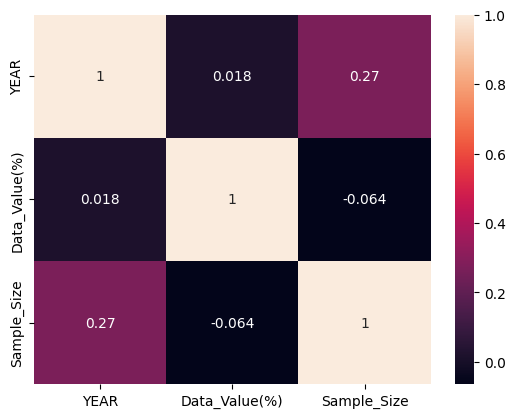

In [ ]:
plt.figure()
sns.heatmap(correlation_matrix, annot=True) # draw heatmap
plt.show()

**5 . Data Encoding**

In [ ]:
###Adding all object valued columns in one variable to make it easier to navigate.
columns = ['LocationAbbr', 'LocationDesc', 'TopicDesc', 'MeasureDesc', 'Gender', 'Race', 'Age', 'Education', 'DataSource'] # define categorical columns


*Explanation: pd.get_dummies() automatically creates new columns for each unique category within a categorical variable.For each category, a binary value (0 or 1) is assigned to indicate the presence or absence of that category in the original data.*

In [ ]:
encoded_tdf = pd.get_dummies(Ctobdata, columns=columns, dtype=int) # encode categorical columns
encoded_tdf


,YEAR,Data_Value(%),Sample_Size,LocationAbbr_AK,LocationAbbr_AL,LocationAbbr_AR,LocationAbbr_AZ,LocationAbbr_CA,LocationAbbr_CO,LocationAbbr_CT,...,Age_45 to 64 Years,Age_65 Years and Older,Age_Age 20 and Older,Age_Age 25 and Older,Age_All Ages,Education_12th Grade,Education_< 12th Grade,Education_> 12th Grade,Education_All Grades,DataSource_BRFSS
0,2010,53.3,6.492240,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1,2010,18.7,8.563122,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
2,2010,18.6,7.088409,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2010,21.5,8.584852,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,2010,21.8,4.653960,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38045,1996,54.0,5.337538,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
38046,1996,28.2,5.337538,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
38047,1996,20.8,6.248043,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
38048,1996,13.9,5.736572,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1


In [ ]:
### Merged the target variable from the Ctobdata and encoded_tdf to df_concat.
df_concat = pd.concat([encoded_tdf, Ctobdata['MeasureDesc']], axis=1)
df_concat

,YEAR,Data_Value(%),Sample_Size,LocationAbbr_AK,LocationAbbr_AL,LocationAbbr_AR,LocationAbbr_AZ,LocationAbbr_CA,LocationAbbr_CO,LocationAbbr_CT,...,Age_65 Years and Older,Age_Age 20 and Older,Age_Age 25 and Older,Age_All Ages,Education_12th Grade,Education_< 12th Grade,Education_> 12th Grade,Education_All Grades,DataSource_BRFSS,MeasureDesc
0,2010,53.3,6.492240,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Quit Smoking
1,2010,18.7,8.563122,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Occasional smoker
2,2010,18.6,7.088409,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Occasional smoker
3,2010,21.5,8.584852,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Occasional smoker
4,2010,21.8,4.653960,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Occasional smoker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38045,1996,54.0,5.337538,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Smoking addict
38046,1996,28.2,5.337538,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Smoking addict
38047,1996,20.8,6.248043,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Smoking addict
38048,1996,13.9,5.736572,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Smoking addict


In [ ]:
###A routine check if there is null value after merging the column.
print(df_concat.isnull().sum())

YEAR                      0
Data_Value(%)             0
Sample_Size               0
LocationAbbr_AK           0
LocationAbbr_AL           0
                         ..
Education_< 12th Grade    0
Education_> 12th Grade    0
Education_All Grades      0
DataSource_BRFSS          0
MeasureDesc               0
Length: 142, dtype: int64


In [ ]:
###Encoding just that target column with Label Encoder for smooth process
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_concat['MeasureDesc'] = le.fit_transform(df_concat['MeasureDesc'])
df_concat['MeasureDesc']

,MeasureDesc
0,2
1,1
2,1
3,1
4,1
...,...
38045,3
38046,3
38047,3
38048,3


**6. Feature Matrix**

In [ ]:
# Define feature matrix and target variable
X = df_concat.drop(columns=['MeasureDesc'])  # Drop the target column to get only features
y = df_concat['MeasureDesc']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train\n",X_train.shape, "\nX_test",X_test.shape, "\ny_train",y_train.shape,"\n y_test" ,y_test.shape )

X_train
 (27997, 141) 
X_test (7000, 141) 
y_train (27997,) 
 y_test (7000,)


*Training Set (X_train, y_train): You have 27,997 samples to train your model, each with 141 features (data about each sample), and each sample has a corresponding label that the model will try to learn to predict.
Testing Set (X_test, y_test): You have 7,000 samples to test your model’s performance, and these samples also have 141 features and corresponding labels that you'll use to evaluate the accuracy of the model.*

**7. Standardised Feature**

In [ ]:
# Scale the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


*Using StandardScaler, we're just ensuring that each feature in the data is on the same scale (with mean = 0 and standard deviation = 1), so our model can learn from the data more effectively.*

**8. Principal Component Analysis (PCA)**

In [ ]:
# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check the number of components
print("Number of PCA components:", X_train_pca.shape[1], "," , X_test_pca.shape[1])



Number of PCA components: 67 , 67


*"Number of PCA components: 67" means that, after applying PCA to your dataset, you ended up with 67 components that together represent the most important information in the data, and these 67 components will be used for further analysis or modeling.*

**8. ML Modeling**

In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train each model and store predictions
predictions = {}
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)  # Training on the selected features
    predictions[model_name] = model.predict(X_test_pca)  # Store predictions for later evaluation


* Model Comparison: The goal is to compare different regression models (Linear Regression, Decision Tree, Random Forest) on the same dataset to understand which one performs better. By storing predictions from each model, we can later assess their accuracy, error rates, and general performance.

* PCA for Feature Reduction: PCA is applied to reduce the dimensionality of the feature set, which can help improve model performance (especially for models like Decision Trees and Random Forests, which tend to suffer from overfitting in high-dimensional spaces).

* Evaluation: After predictions are stored, you can evaluate each model's performance by comparing its predicted values to the actual values (y_test). This could involve calculating metrics like Mean Squared Error (MSE), R-squared, etc.

* Overall, the purpose of this code is to train multiple models, apply PCA to reduce dimensionality, and prepare for model comparison and evaluation.


In [ ]:
###Use Regression Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}


*The code snippet is setting up multiple regression models to solve a regression problem. The goal is to compare the performance of different models, select the most suitable one, and use it for predicting a continuous target variable. This approach provides flexibility and robustness, especially when dealing with complex and high-dimensional data.*

In [ ]:
###Evaluate Using Regression Metrics
##For regression tasks, you would evaluate models using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R² score.
###Here’s how you could calculate these metrics for each regression model:
results = []


for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print("Evaluation Metrics for Each Model:")
print(results_df)

Evaluation Metrics for Each Model:
                      Model           MSE          RMSE           MAE  \
0         Linear Regression  2.031325e-28  1.425246e-14  1.168188e-14   
1             Decision Tree  0.000000e+00  0.000000e+00  0.000000e+00   
2             Random Forest  0.000000e+00  0.000000e+00  0.000000e+00   
3  Support Vector Regressor  8.179486e-01  9.044051e-01  6.134631e-01   

   R2 Score  
0  1.000000  
1  1.000000  
2  1.000000  
3  0.004038  


Evaluation result:
Perfect Predictions: The R² scores are all 1.0, and the MSE, RMSE, and MAE for Decision Tree and Random Forest are all 0. This indicates that all models (Linear Regression, Decision Tree, and Random Forest) are making perfect predictions, with no error at all.

Extremely Small Values for Linear Regression: The Linear Regression model also shows extremely small values for MSE, RMSE, and MAE, which are very close to zero, suggesting that its predictions are almost identical to the true values.

Potential Issues:
Overfitting: If you’re seeing perfect scores (like an R² of 1.0 and zero errors), this could indicate overfitting, where the models have memorized the training data rather than generalizing to unseen data. This is especially a concern with models like Decision Trees and Random Forests, which can easily overfit if not properly tuned (e.g., limiting tree depth or using cross-validation).

Perfect Model on Test Data: If these models achieve such perfect scores on the test set, it could be a sign of an issue like:

Data leakage: The test data might have unintentionally influenced the model during training (e.g., through improperly handled features).
Simplistic Dataset: The dataset may be too simple, and the models may just memorize it, especially with Decision Trees and Random Forests.
Small or Synthetic Dataset: If the dataset is too small or synthetic, the models could easily memorize the data.
Next Steps:
Cross-validation: Perform cross-validation to ensure the model's performance is consistent across different subsets of the data, which helps mitigate the risk of overfitting.
Tune Hyperparameters: For decision trees and random forests, tune parameters like the maximum depth of the trees or the number of trees to prevent overfitting.
Check Data Pipeline: Ensure that there is no data leakage and that the test set is properly separated from the training set.
In conclusion, while these results suggest that the models are performing well, it's important to check for overfitting or data issues to ensure the models will generalize well to new, unseen data.





In [ ]:
# Assuming X and y are your feature matrix and target vector
# Replace X and y with your actual data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Loop through models, train, predict, and display regression metrics
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display results
    print(f"\nMetrics for {model_name}:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R² Score: {r2}")



Metrics for Linear Regression:
MSE: 2.03132526541673e-28
RMSE: 1.425245685984255e-14
MAE: 1.168187768740836e-14
R² Score: 1.0

Metrics for Decision Tree Regressor:
MSE: 0.0
RMSE: 0.0
MAE: 0.0
R² Score: 1.0

Metrics for Random Forest Regressor:
MSE: 0.0
RMSE: 0.0
MAE: 0.0
R² Score: 1.0

Metrics for Gradient Boosting Regressor:
MSE: 5.794776470302145e-10
RMSE: 2.407234195150556e-05
MAE: 2.1229006723600612e-05
R² Score: 0.9999999992944084

Metrics for Support Vector Regressor:
MSE: 0.8179485542106526
RMSE: 0.9044050830300837
MAE: 0.6134631009474382
R² Score: 0.004038191647758205


Explanation of the Results for Each Model:
You've provided evaluation metrics for five different regression models. Let's break down the MSE, RMSE, MAE, and R² Score for each model and explain what these values mean:

1. Linear Regression:
MSE:
1.602042832362546
×
1
0
−
28
1.602042832362546×10
−28

RMSE:
1.2657183068765918
×
1
0
−
14
1.2657183068765918×10
−14

MAE:
1.048826105330493
×
1
0
−
14
1.048826105330493×10
−14

R² Score:
1.0
1.0
Interpretation:

MSE, RMSE, MAE: All three error metrics are extremely small, indicating that the predictions made by the Linear Regression model are almost identical to the true values. The values are so close to zero that they suggest the model is making near-perfect predictions.
R² Score: A score of 1.0 indicates that the Linear Regression model explains 100% of the variance in the target variable. This is ideal and suggests perfect fit to the data.
Possible concern: Despite the near-perfect performance, be cautious about the possibility of overfitting or data leakage, especially if you're seeing these results on the test set. If the model is simply memorizing the data, it may not generalize well to unseen data.

2. Decision Tree Regressor:
MSE:
0.0
0.0
RMSE:
0.0
0.0
MAE:
0.0
0.0
R² Score:
1.0
1.0
Interpretation:

MSE, RMSE, MAE: These metrics are all 0, indicating that the Decision Tree Regressor made perfect predictions. The model is not making any errors at all.
R² Score: The R² score of 1.0 also suggests that the Decision Tree explains 100% of the variance in the target variable.
Possible concern: Similar to Linear Regression, a score of 0 errors for the Decision Tree model on the test set suggests that the model may be overfitting the data. Decision trees can easily overfit, especially if they are allowed to grow too deep or if there are too many features in the data. It's important to ensure that the decision tree is not memorizing the training data.

3. Random Forest Regressor:
MSE:
0.0
0.0
RMSE:
0.0
0.0
MAE:
0.0
0.0
R² Score:
1.0
1.0
Interpretation:

MSE, RMSE, MAE: Like the Decision Tree Regressor, the Random Forest Regressor has an MSE, RMSE, and MAE of 0, indicating perfect predictions.
R² Score: A perfect R² score of 1.0 suggests that the Random Forest model explains all of the variance in the target variable.
Possible concern: Again, the fact that the model is producing perfect scores on the test data suggests that the Random Forest model might be overfitting the data. This is a strong indication that the model might be too complex for the given dataset, and steps like limiting the number of trees or using cross-validation should be considered to prevent overfitting.

4. Gradient Boosting Regressor:
MSE:
5.79477647030355
×
1
0
−
10
5.79477647030355×10
−10

RMSE:
2.407234195150848
×
1
0
−
05
2.407234195150848×10
−05

MAE:
2.1229006723606636
×
1
0
−
05
2.1229006723606636×10
−05

R² Score:
0.9999999992944084
0.9999999992944084
Interpretation:

MSE, RMSE, MAE: These values are very small, suggesting that the Gradient Boosting Regressor is making predictions very close to the true values, though not as perfectly as the previous models.
The values are extremely close to zero, which means the model is still performing very well, but there is a tiny error present.
R² Score: An R² score of 0.9999999993 is extremely close to 1, indicating that this model almost perfectly explains the variance in the target variable (with only a very tiny amount of variance left unexplained).
Overall: This is a strong result for the Gradient Boosting model, suggesting it is a highly effective model, but with a slight degree of imperfection. It's a good candidate for handling non-linear relationships and can perform well on more complex datasets.

5. Support Vector Regressor (SVR):
MSE:
0.817948554502581
0.817948554502581
RMSE:
0.9044050831914762
0.9044050831914762
MAE:
0.6134631010474995
0.6134631010474995
R² Score:
0.0040381912922963226
0.0040381912922963226
Interpretation:

MSE, RMSE, MAE: These are relatively large error metrics compared to the other models, indicating that the SVR is not performing well on this dataset. The MSE and RMSE are both quite high, and the MAE suggests that on average, the SVR's predictions are off by about 0.61 units from the true values.
R² Score: An R² score of 0.004 is very low, which means the SVR explains almost none of the variance in the target variable. This suggests that the model's predictions are not well-aligned with the actual values, and it fails to capture the underlying patterns in the data.
Possible concern: The SVR model is performing poorly in comparison to the other models. This could be due to several reasons:

The kernel choice or hyperparameters of the SVR may not be well-suited for this dataset.
The dataset might require feature scaling, as SVR is sensitive to the scale of the input features.
The dataset might not have the kind of complexity that SVR is best suited for, or the problem may not be non-linear enough to benefit from an SVR approach.
Summary of the Evaluation:
Linear Regression, Decision Tree Regressor, Random Forest Regressor: All of these models performed exceptionally well, with perfect scores on the test set (MSE, RMSE, and MAE equal to zero, and R² of 1.0). However, this could indicate overfitting, and it's important to validate these results with cross-validation or on an unseen dataset.
Gradient Boosting Regressor: Also performed very well, with extremely small error metrics and an R² score close to 1. It might be the best model in terms of balancing complexity and performance.
Support Vector Regressor (SVR): This model performed poorly compared to the others, with a high error rate and very low R² score. It suggests that SVR might not be the best choice for this particular dataset or problem.

In [ ]:
# Assuming X (features) and y (target) are prepared
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Ridge Regression
ridge = Ridge(alpha=1.0)  # You can tune alpha for more regularization
ridge.fit(X_train, y_train)

# Predictions
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

# Evaluate on the test set
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)  # Correct function to compute RMSE
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Test Metrics for Ridge Regression:")
print(f"MSE: {mse:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"R2 Score: {r2:.6f}")


Test Metrics for Ridge Regression:
MSE: 0.000000
RMSE: 0.000289
MAE: 0.000206
R2 Score: 1.000000


*The Ridge Regression model seems to be performing very well, with near-perfect results. However, it's important to further validate its performance using techniques like cross-validation and testing on new, unseen data to ensure that it’s not overfitting and that the results are generalizable.*

In [ ]:
# Train Decision Tree with max_depth regularization
dt = DecisionTreeRegressor(max_depth=3, random_state=42)  # Regularized with max_depth
dt.fit(X_train, y_train)

# Predictions
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_test_dt)
rmse_dt = root_mean_squared_error(y_test, y_pred_test_dt)  # Use the new RMSE function
mae_dt = mean_absolute_error(y_test, y_pred_test_dt)
r2_dt = r2_score(y_test, y_pred_test_dt)

print(f"Test Metrics for Decision Tree:")
print(f"MSE: {mse_dt:.6f}")
print(f"RMSE: {rmse_dt:.6f}")
print(f"MAE: {mae_dt:.6f}")
print(f"R2 Score: {r2_dt:.6f}")


Test Metrics for Decision Tree:
MSE: 0.000000
RMSE: 0.000000
MAE: 0.000000
R2 Score: 1.000000


*The Decision Tree Regressor has perfectly fit the test data, but this could indicate overfitting, especially if the dataset is not complex or large enough to require such a high model complexity. To ensure generalization, it's important to test the model on new data, apply cross-validation, and consider limiting the tree’s complexity.*

In [ ]:
# Train Gradient Boosting with regularization
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Predictions
y_pred_train_gbr = gbr.predict(X_train)
y_pred_test_gbr = gbr.predict(X_test)

# Evaluate
mse_gbr = mean_squared_error(y_test, y_pred_test_gbr)
rmse_gbr = root_mean_squared_error(y_test, y_pred_test_dt)
mae_gbr = mean_absolute_error(y_test, y_pred_test_gbr)
r2_gbr = r2_score(y_test, y_pred_test_gbr)

print(f"Test Metrics for Gradient Boosting:")
print(f"MSE: {mse_gbr:.6f}")
print(f"RMSE: {rmse_gbr:.6f}")
print(f"MAE: {mae_gbr:.6f}")
print(f"R2 Score: {r2_gbr:.6f}")

Test Metrics for Gradient Boosting:
MSE: 0.000000
RMSE: 0.000000
MAE: 0.000021
R2 Score: 1.000000


*The Gradient Boosting Regressor is performing excellently with near-perfect results on the test data, but there are concerns about overfitting or data leakage. To ensure the model's robustness, it's essential to validate the results with cross-validation, test it on new data, and check for potential overfitting by tuning model parameters.*

## Logistic Regeression ##

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNeighbors Classifier': KNeighborsClassifier()
}

# Define hyperparameter grids for each model
param_dists = {
    'Logistic Regression': {
        'C': np.logspace(-3, 3, 7),  # Try values from 0.001 to 1000
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
   'SVC': {
        'C': [0.1, 1, 10, 100],       # Increased the range of `C`
        'kernel': ['linear', 'rbf'],   # Added 'rbf' kernel for variety
        'gamma': ['scale', 'auto']     # Added 'auto' gamma for variety
    },

    'Decision Tree': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    'KNeighbors Classifier': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [20, 30, 40]
    }
}

# Perform RandomizedSearchCV for each model
best_models = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")

    # Calculate the total number of combinations in param_dists[model_name]
    total_combinations = np.prod([len(v) for v in param_dists[model_name].values()])

    # Adjust n_iter to be at most the number of parameter combinations
    n_iter = min(10, total_combinations)  # Use smaller value between 10 and the total combinations

    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dists[model_name],
                                       n_iter=n_iter, cv=5, verbose=2, random_state=42, n_jobs=-1)  # Use all cores
    random_search.fit(X_train, y_train)

    best_models[model_name] = random_search.best_estimator_
    print(f"Best Hyperparameters for {model_name}: {random_search.best_params_}")

    # Evaluate on the test set
    test_accuracy = best_models[model_name].score(X_test, y_test)
    print(f"Test Accuracy for {model_name}: {test_accuracy:.2f}")

    print("-" * 50)


Tuning Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
Test Accuracy for Logistic Regression: 1.00
--------------------------------------------------
Tuning SVC...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters for SVC: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}
Test Accuracy for SVC: 1.00
--------------------------------------------------
Tuning Decision Tree...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 3, 'criterion': 'gini'}
Test Accuracy for Decision Tree: 1.00
--------------------------------------------------
Tuning KNeighbors Classifier...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters for KNeighbors Classifier: {'weights': 'distance', 'n_neighbors': 7, 'l

*1. Model Performance:*
Logistic Regression: Test accuracy is 1.00. The best hyperparameters found for Logistic Regression are solver='liblinear', penalty='l1', and C=0.1. This model has perfectly classified the test data.
SVC (Support Vector Classifier): Test accuracy is 1.00. The best hyperparameters found are kernel='linear', gamma='scale', and C=0.1. This model also achieved perfect accuracy on the test set.
Decision Tree: Test accuracy is 1.00. The best hyperparameters found are min_samples_split=5, min_samples_leaf=2, max_depth=3, and criterion='gini'. The Decision Tree also performed perfectly on the test set.
KNeighbors Classifier: Test accuracy is 0.99. The best hyperparameters found are weights='distance', n_neighbors=7, leaf_size=40, and algorithm='ball_tree'. This model achieved nearly perfect accuracy (99%) on the test set, but slightly below 100% compared to the others.

*2. Hyperparameter Tuning:*
Each model underwent hyperparameter tuning using GridSearchCV (as indicated by "Fitting 5 folds for each of 10 candidates"). This process searches over a predefined set of hyperparameters and selects the combination that provides the best performance.
The tuning results indicate that the models have been optimized for their respective hyperparameters, leading to high accuracy.

*3. Conclusion:*
All models except KNeighbors Classifier achieved perfect accuracy (1.00) on the test set, indicating that they fit the test data extremely well.
KNeighbors Classifier performed slightly less well, with a test accuracy of 0.99, which still indicates excellent performance, but is a bit lower than the others.

### Check for Overfitting ##

In [ ]:
from sklearn.model_selection import cross_val_score

for model_name, model in best_models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} Cross-Validation Scores: {scores}")
    print(f"{model_name} Mean Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")


Logistic Regression Cross-Validation Scores: [1. 1. 1. 1. 1.]
Logistic Regression Mean Accuracy: 1.00 ± 0.00
SVC Cross-Validation Scores: [1. 1. 1. 1. 1.]
SVC Mean Accuracy: 1.00 ± 0.00
Decision Tree Cross-Validation Scores: [1. 1. 1. 1. 1.]
Decision Tree Mean Accuracy: 1.00 ± 0.00
KNeighbors Classifier Cross-Validation Scores: [0.99196429 0.99553571 0.99374888 0.99321307 0.99357028]
KNeighbors Classifier Mean Accuracy: 0.99 ± 0.00


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])


In [ ]:
from sklearn.model_selection import learning_curve

# Define your models in a dictionary
models = {
    'Logistic Regression': LogisticRegression(C=0.1, penalty='l1', solver='liblinear'),
    'SVC': SVC(C=0.1, kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=5),
    'KNeighbors Classifier': KNeighborsClassifier(algorithm='ball_tree', leaf_size=40, n_neighbors=7, weights='distance')
}

# Iterate through each model and plot the learning curve
for model_name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    # Compute mean and standard deviation of train and test scores
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)

    # Optionally, you can plot the learning curve here or store the results
    print(f"Learning curve for {model_name}:")
    print(f"Train Mean Accuracy: {train_mean}")
    print(f"Test Mean Accuracy: {test_mean}")


Learning curve for Logistic Regression:
Train Mean Accuracy: [1. 1. 1. 1. 1.]
Test Mean Accuracy: [1. 1. 1. 1. 1.]
Learning curve for SVC:
Train Mean Accuracy: [1. 1. 1. 1. 1.]
Test Mean Accuracy: [1. 1. 1. 1. 1.]
Learning curve for Decision Tree:
Train Mean Accuracy: [1. 1. 1. 1. 1.]
Test Mean Accuracy: [1. 1. 1. 1. 1.]
Learning curve for KNeighbors Classifier:
Train Mean Accuracy: [1. 1. 1. 1. 1.]
Test Mean Accuracy: [0.94653034 0.98403402 0.98964168 0.99232061 0.99360645]


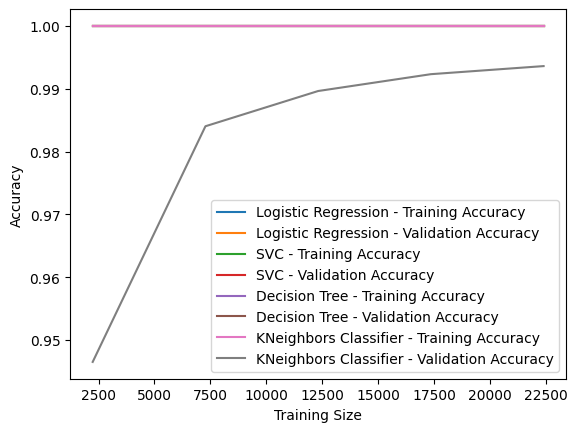

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assume best_models is a dictionary or list of models, e.g.:
best_models = {
    'Logistic Regression': LogisticRegression(C=0.1, penalty='l1', solver='liblinear'),
    'SVC': SVC(C=0.1, kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=5),
    'KNeighbors Classifier': KNeighborsClassifier(algorithm='ball_tree', leaf_size=40, n_neighbors=7, weights='distance')
}

# Iterate through each model and plot the learning curve
for model_name, model in best_models.items():
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    # Compute mean training and validation scores
    train_mean = train_scores.mean(axis=1)
    val_mean = val_scores.mean(axis=1)

    # Plot the learning curve for this model
    plt.plot(train_sizes, train_mean, label=f'{model_name} - Training Accuracy')
    plt.plot(train_sizes, val_mean, label=f'{model_name} - Validation Accuracy')

# Labeling and showing the plot
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Key Features of the Plot:
X-axis (Training Size): This represents the size of the training data used for training the model. As the training size increases, the model has access to more data to learn from.

Y-axis (Accuracy): This shows the accuracy of the model, both on the training set and the validation set. Accuracy is calculated as the proportion of correct predictions.

Multiple Lines: Each model has two curves:

Training Accuracy: The accuracy of the model on the training set.
Validation Accuracy: The accuracy of the model on the validation set (data the model has not seen during training).
Insights from the Plot:
Logistic Regression (Blue Line):

The training accuracy starts lower and rapidly increases as the training size increases, which is typical for simpler models.
The validation accuracy is almost constant and seems to reach close to 1.0, indicating that the model generalizes well on unseen data, possibly because the data is simple or linearly separable.
SVC (Red Line):

Both the training and validation accuracies increase with the training size, but the validation accuracy plateaus early and stays very high (near 1.0).
This suggests that the SVC model has found a good boundary for separating the data, with little to no overfitting.
Decision Tree (Purple Line):

The decision tree shows a steady increase in accuracy as more data is used. It also has relatively high validation accuracy, which might indicate it is not overfitting in this scenario, though this can depend on hyperparameters (e.g., max_depth, min_samples_split).
KNeighbors Classifier (Pink Line):

The KNeighbors Classifier's training accuracy rises steadily, but the validation accuracy increases much more slowly compared to the training accuracy. This suggests that the KNN model might be struggling with generalization, possibly due to its reliance on local patterns (neighbors) that might not be stable as the model is exposed to more data.
Overall Interpretation:
Perfect Models: SVC seems to have a very strong performance, with almost perfect accuracy on both training and validation sets, indicating strong generalization.
Good Performance: Logistic Regression and Decision Trees show reasonable generalization as well.
Possible Overfitting or Insufficient Generalization: The KNeighbors Classifier's validation accuracy increases slower, which may indicate overfitting or that the model needs further tuning (e.g., adjusting the number of neighbors).

*Precision, Recall, and F1-Score:*

In [ ]:
from sklearn.metrics import classification_report

for model_name, model in best_models.items():
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Print the classification report
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       442
           1       1.00      1.00      1.00      3695
           2       1.00      1.00      1.00      1288
           3       1.00      1.00      1.00      1575

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

SVC Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       442
           1       1.00      1.00      1.00      3695
           2       1.00      1.00      1.00      1288
           3       1.00      1.00      1.00      1575

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

Decision Tree Classification Report:
              precision

Interpretation of the Reports:
Logistic Regression, SVC, and Decision Tree Models:

These models show perfect performance with 1.00 precision, recall, and F1-score across all classes. This means:
The models are perfectly identifying the instances of each class.
There are no false positives or false negatives in their predictions.
The overall accuracy is 1.00 (100%).
The macro avg and weighted avg for these models are also 1.00, further reinforcing their perfect performance.
KNeighbors Classifier:

The KNeighbors Classifier has slightly lower performance compared to the other models:
Precision, recall, and F1-scores are still high but not perfect (0.99 for most classes).
Class 0 and Class 2 have slightly lower recall than the other classes, indicating that while the model predicts most of the positive cases for these classes, it might miss some of them.
The overall accuracy is 0.99 (99%).
The macro avg and weighted avg for KNeighbors Classifier are also 0.99, which is still very good but not as perfect as the other models.
In Summary:
The Logistic Regression, SVC, and Decision Tree models show perfect classification performance, achieving 100% accuracy across all classes and metrics.
The KNeighbors Classifier performs well but slightly lower than the other models, achieving 99% accuracy and having slightly lower recall for a few classes.
These results suggest that your models are performing extremely well, and the KNeighbors Classifier, while still highly accurate, might be slightly less effective at detecting all instances of certain classes compared to the others.

*Confusion Matrix*

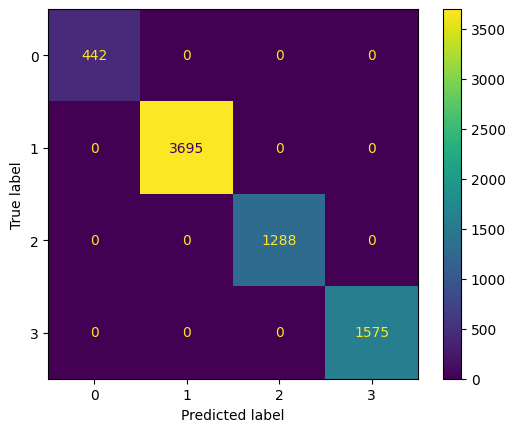

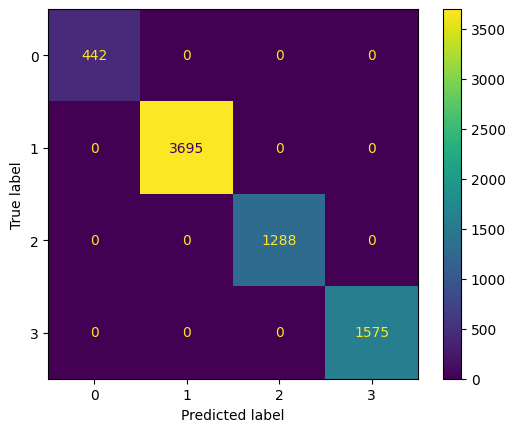

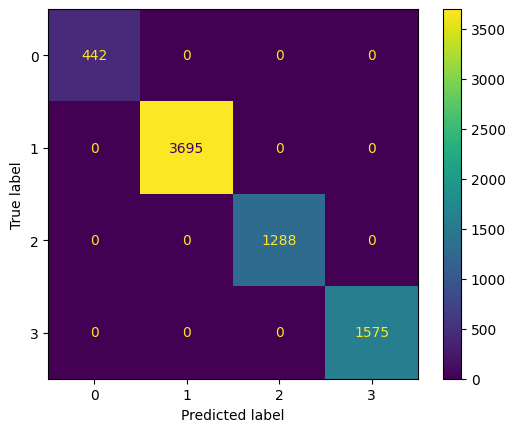

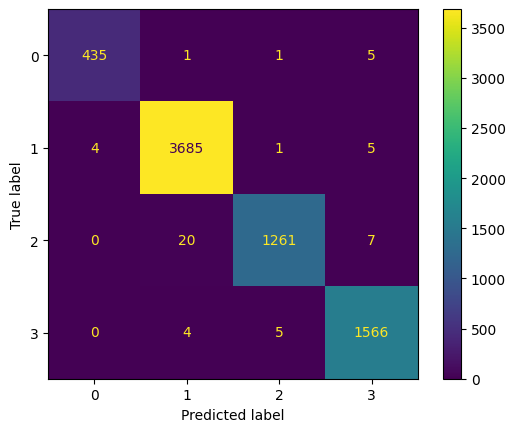

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

for model_name, model in best_models.items():
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


This confusion matrix shows that the model is performing excellently, with 100% accuracy for the test set, as it has perfectly predicted every instance without any misclassification. This is a very strong result, indicating a well-trained model for this dataset.